In [14]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [15]:
# nltk count words
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# dataset stupistuff

In [16]:
# Load the data from the JSON file
data_path = './data/stupidstuff.json'
with open(data_path) as f:
    data = json.load(f)

In [17]:
# create pandas dataframe of the data
df = pd.DataFrame(data)
df.head()

body      category  id  rating
0  A blackjack dealer and a player with a thirtee...      Children   1    2.63
1  At a dinner party, several of the guests were ...  Blonde Jokes   2    2.57
2  One day this cop pulls over a blonde for speed...  Blonde Jokes   3    3.09
3  Three women are about to be executed for crime...  Blonde Jokes   4    4.10
4  A girl came skipping home FROM school one day....  Blonde Jokes   5    4.30

In [18]:
# get jokes with highest scores min 4.5
good_jokes = df[df['rating'] >= 4.5].values
# random sample of 5 jokes
print(np.array(good_jokes).shape)
# 5 random indices min max
number_of_jokes = 5
idx = np.random.randint(0, len(good_jokes), number_of_jokes)
for i in idx:
    print(good_jokes[i][0])
    print(good_jokes[i][1])
    print(good_jokes[i][2])
    print('-----------')

(744, 4)
People clap when they see you -- their hands over their eyes or ears.
Insults
1592
-----------
It was the end of the school year. The teacher had turned in her grades; there was nothing really for the class to do.All the kids were restless and it was near the end of the day. So the teacher thought of an activity. She said, "The first ones to answer correctly the questions I ask may leave early today." Little Johnny said to himself, "Good, I'm smart and I want to get outa here."The teacher asked, "Who said 'Four Score and Seven Years Ago'?" But before Johnny could open his mouth, Susie said, "Abraham Lincoln?"The teacher said, "That's right, Susie. You may go." Johnny was mad that Susie had answered first.The teacher asked, "Who said 'I Have a Dream'?" But before Johnny could open his mouth, Mary said, "Martin Luther King!" The teacher said, "That's right, Mary. You may go." Johnny was even madder than before. Mary had answered first. The teacher asked, "Who said 'Ask not what 

Animals
Aviation
Bar Jokes
Blind Jokes
Blonde Jokes
Business
Children
Computers
Crazy Jokes
Deep Thoughts
English
Ethnic Jokes
Family, Parents
Farmers
Food Jokes
Heaven and Hell
Holidays
Idiots
Insults
Lawyers
Light Bulbs
Love & Romance
Marriage
Medical
Men
Military
Miscellaneous
Money
Music
Office Jokes
Old Age
One Liners
Police Jokes
Political
Redneck
Religious
School
Science
Sex
Sports
State Jokes
Women
Yo Mama
amount of categories: 43


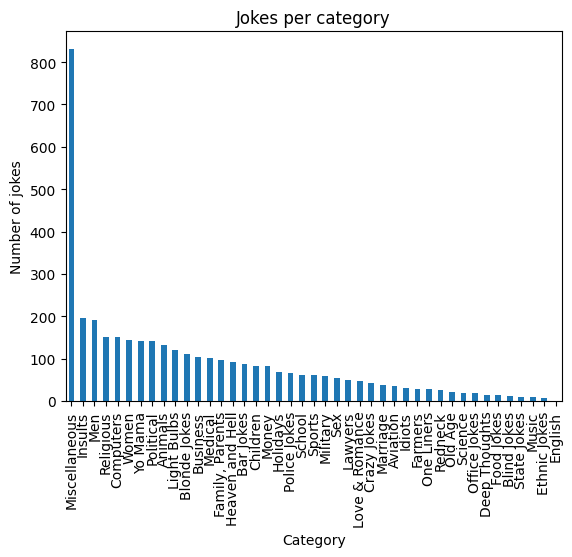

In [19]:
#print unique categories
categories = df['category'].unique()
categories= sorted(categories)
for category in categories:
    print(category)
print('amount of categories:', len(categories))
# plot the distribution of categories
category_counts = df['category'].value_counts()
category_counts.plot(kind='bar')
plt.title('Jokes per category')
plt.ylabel('Number of jokes')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()


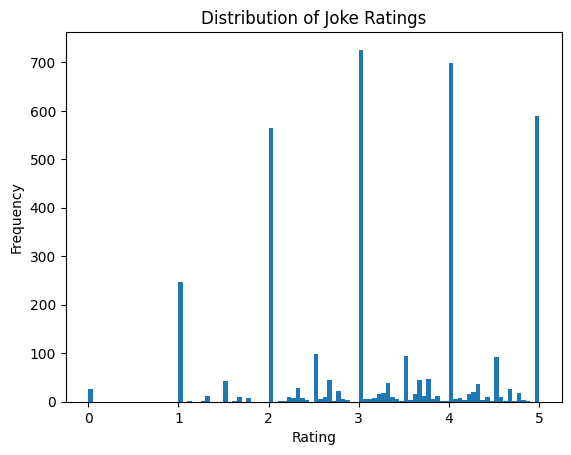

In [20]:
# plot the distribution of ratings
ratings = df['rating']
plt.hist(ratings, bins=100)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Joke Ratings')
plt.show()

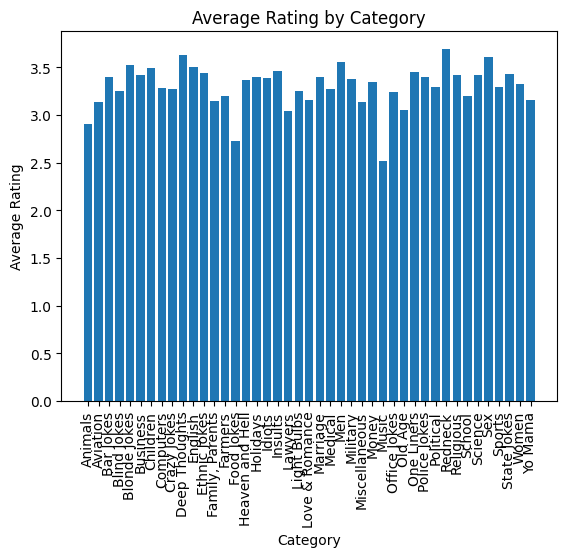

In [21]:
# plot the average rating per category
means = [df[df['category'] == category]['rating'].mean() for category in categories]

plt.bar(categories, means)
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating by Category')
plt.xticks(rotation=90)
plt.show()

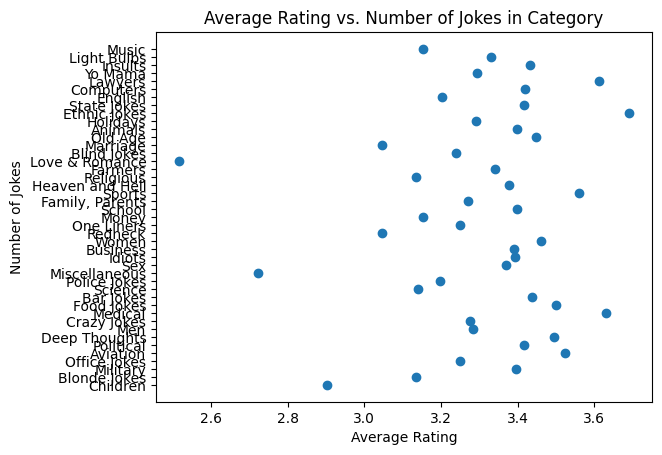

In [22]:
category_means = df.groupby('category')['rating'].mean()
category_means = category_means[categories]
# give each category a id number and add to plot to each scatter
category_counts = df['category'].unique()

plt.scatter(category_means, category_counts)
plt.xlabel('Average Rating')
plt.ylabel('Number of Jokes')
plt.title('Average Rating vs. Number of Jokes in Category')
plt.show()

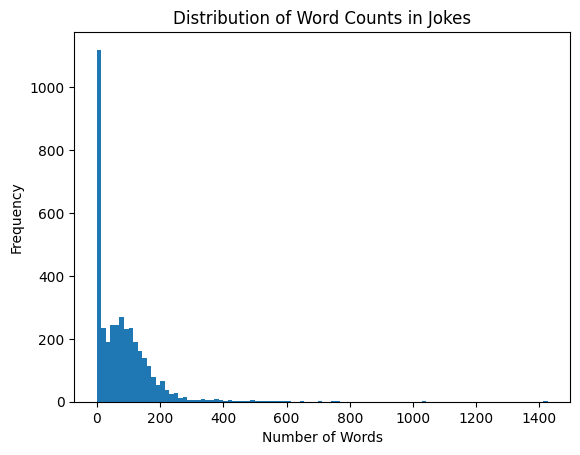

In [23]:
stop_words = set(stopwords.words('english'))

# get all the jokes
jokes = df['body'].values

# tokenize the jokes
tokenized_jokes = [word_tokenize(joke) for joke in jokes]

# remove stop words
filtered_jokes = [[word for word in joke if word.lower() not in stop_words] for joke in tokenized_jokes]

# count the number of words in each joke
word_counts = [len(joke) for joke in filtered_jokes]

# plot the distribution of word counts
plt.hist(word_counts, bins=100)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Jokes')
plt.show()

In [24]:
# count the frequency of each word
word_freq = Counter()
for joke in filtered_jokes:
    word_freq.update(joke)

# get the most common words
most_common = word_freq.most_common(100)

for word, count in most_common:
    print(word, count)

, 25353
. 22851
`` 12833
'' 10173
? 4538
! 3501
's 3136
: 2863
said 2359
n't 2324
man 1992
says 1836
one 1549
back 1004
get 970
asked 962
would 917
... 844
day 840
-- 824
'm 819
time 735
know 730
wife 722
like 719
' 707
first 695
guy 692
Well 676
went 668
got 666
go 664
'll 648
're 648
woman 632
replied 604
two 594
old 590
asks 581
- 574
take 550
've 536
could 533
going 487
little 483
blonde 481
next 479
want 468
good 467
see 463
came 448
husband 448
home 441
) 437
goes 435
$ 405
car 404
replies 403
doctor 400
think 398
say 393
boy 393
told 388
give 385
three 378
tell 378
One 376
new 375
way 373
( 371
God 369
around 367
make 366
Q 364
right 362
* 360
.. 358
people 358
door 348
Oh 342
years 332
second 323
later 320
ca 316
never 311
last 308
really 308
room 307
away 306
another 301
young 300
minutes 299
look 293
house 292
; 292
dog 292
night 291
comes 290
come 287
work 284


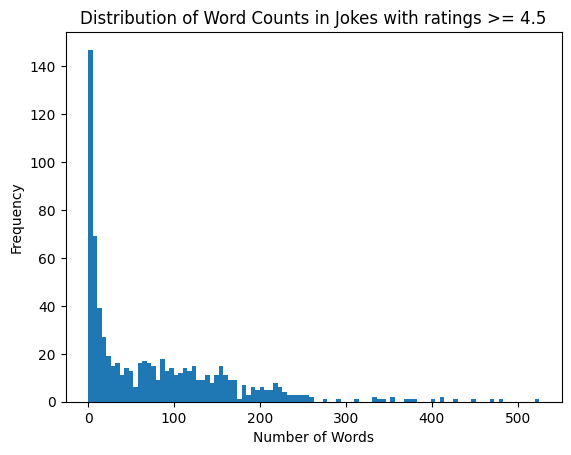

In [25]:

# get all the jokes with ratings greater than 4.5
good_jokes = df[df['rating'] >= 4.5]['body'].values

# tokenize the jokes
tokenized_good_jokes = [word_tokenize(joke) for joke in good_jokes]

# remove stop words
filtered_good_jokes = [[word for word in joke if word.lower() not in stop_words] for joke in tokenized_good_jokes]

# count the number of words in each joke
word_good_counts = [len(joke) for joke in filtered_good_jokes]

# plot the distribution of word counts
plt.hist(word_good_counts, bins=100)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Jokes with ratings >= 4.5')
plt.show()

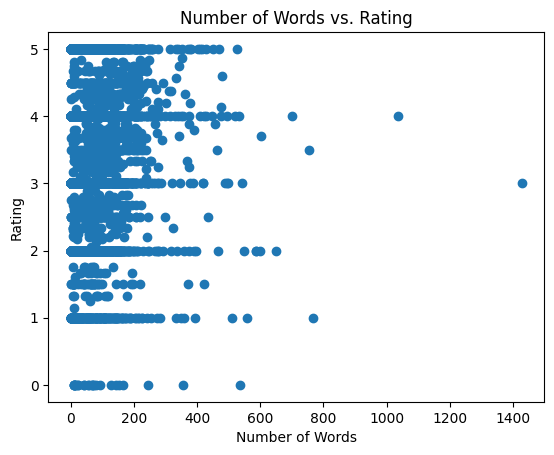

In [26]:
# joke length vs rating
plt.scatter(word_counts, ratings)
plt.xlabel('Number of Words')
plt.ylabel('Rating')
plt.title('Number of Words vs. Rating')
plt.show()